In [1]:
import pandas as pd
import numpy as np

In [2]:
input_df = pd.read_csv("hw1_input.csv")

Normalization of the input data

In [3]:
from sklearn.preprocessing import StandardScaler

x = input_df.values
x_normalized = StandardScaler().fit_transform(x)


Control of the mean and standard deviation of normalized data

In [4]:
np.mean(x_normalized), np.std(x_normalized)

(np.float64(-3.858909780987557e-17), np.float64(1.0))

In [5]:
from sklearn.decomposition import PCA

pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x_normalized)
explained_variance = pca_breast.explained_variance_ratio_

In [6]:
print('Explained variation per principal component: {}'.format(explained_variance))


Explained variation per principal component: [0.20715348 0.11070825]


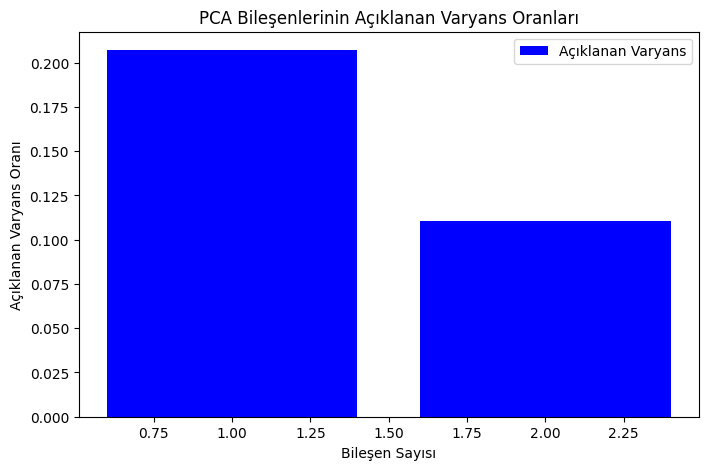

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='b', label='Açıklanan Varyans')
# plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', color='r', label='Kümülatif Açıklanan Varyans')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Açıklanan Varyans Oranı')
plt.title('PCA Bileşenlerinin Açıklanan Varyans Oranları')
plt.legend()
plt.show()

Variation explained by principal components is seen above and these values are so low; therefore, we will increase the component number.

In [8]:
pca_breast_variable = PCA(n_components=11)
principalComponents_breast = pca_breast_variable.fit_transform(x_normalized)
explained_variance_trial = pca_breast_variable.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(np.cumsum(explained_variance_trial)))


Explained variation per principal component: [0.20715348 0.31786173 0.41789557 0.51396794 0.60583873 0.69429699
 0.77995603 0.86160656 0.93500519 0.99330787 1.        ]


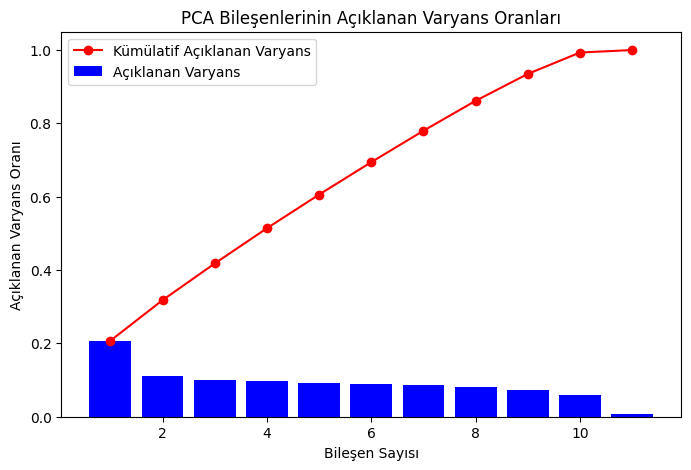

In [9]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_trial) + 1), explained_variance_trial, color='b', label='Açıklanan Varyans')
plt.plot(range(1, len(explained_variance_trial) + 1), np.cumsum(explained_variance_trial), marker='o', color='r', label='Kümülatif Açıklanan Varyans')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Açıklanan Varyans Oranı')
plt.title('PCA Bileşenlerinin Açıklanan Varyans Oranları')
plt.legend()
plt.show()

The dimension of the data could not be reduced effectively by PCA because there is no component that explained variance very well. If we want to use these components, we may use first 8 components because these components explain %86 of variance.